# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [4]:
# Create dataframe to hold weather for city data
weather_df = pd.DataFrame(cities)

weather_df.head()

,0
0,boleslawiec
1,rikitea
2,yellowknife
3,pa sang
4,vardo


In [8]:
# Rename first 2 columns
weather_df.rename(columns = {0:'City'}, inplace = True)

weather_df.head()

,City,Country,Lat,Lon,Date,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,boleslawiec,,,,,,,,
1,rikitea,,,,,,,,
2,yellowknife,,,,,,,,
3,pa sang,,,,,,,,
4,vardo,,,,,,,,


In [6]:
# Add Columns for Temp, Humidity, Cloudiness, and Windspeed
weather_df['Country'] = ''
weather_df['Lat'] = ''
weather_df['Lon'] = ''
weather_df['Date'] = ''
weather_df['Temp (F)'] = ''
weather_df['Humidity (%)'] = ''
weather_df['Cloudiness (%)'] = ''
weather_df['Wind Speed (mph)'] = ''

weather_df.head()

,0,Country,Lat,Lon,Date,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,boleslawiec,,,,,,,,
1,rikitea,,,,,,,,
2,yellowknife,,,,,,,,
3,pa sang,,,,,,,,
4,vardo,,,,,,,,


In [9]:
# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

counter = 1
for index, row in weather_df.iterrows():
    
    city = row['City']
    target_url = f"{base_url}appid={api_key}&q={city}&units={units}"
    
    print(f"#{counter} - Getting data for {row['City']}")
    weather_response = requests.get(target_url).json()
    
    # Try getting all for data points for each city... some may contain no data
    try:
        weather_df.loc[index, "Lat"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Lon"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Temp (F)"] = weather_response["main"]["temp"]
        weather_df.loc[index,"Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index,"Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index,"Wind Speed (mph)"] = weather_response["wind"]["speed"]
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

    counter += 1
    
weather_df.head()

#1 - Getting data for boleslawiec
#2 - Getting data for rikitea
#3 - Getting data for yellowknife
#4 - Getting data for pa sang
#5 - Getting data for vardo
#6 - Getting data for hermanus
#7 - Getting data for novaya malykla
#8 - Getting data for albany
#9 - Getting data for iralaya
#10 - Getting data for san policarpo
#11 - Getting data for rockland
#12 - Getting data for busselton
#13 - Getting data for tiksi
#14 - Getting data for calama
#15 - Getting data for mataura
#16 - Getting data for samusu
Missing field/result... skipping.
#17 - Getting data for la ronge
#18 - Getting data for punta arenas
#19 - Getting data for vaini
#20 - Getting data for mys shmidta
Missing field/result... skipping.
#21 - Getting data for kaitangata
#22 - Getting data for cherskiy
#23 - Getting data for severo-kurilsk
#24 - Getting data for khatanga
#25 - Getting data for fukue
#26 - Getting data for a
Missing field/result... skipping.
#27 - Getting data for illoqqortoormiut
Missing field/result... skippin

#224 - Getting data for isla mujeres
#225 - Getting data for chara
#226 - Getting data for sile
#227 - Getting data for kuche
Missing field/result... skipping.
#228 - Getting data for padang
#229 - Getting data for qui nhon
Missing field/result... skipping.
#230 - Getting data for cranbrook
#231 - Getting data for cody
#232 - Getting data for tullow
#233 - Getting data for namibe
#234 - Getting data for attawapiskat
Missing field/result... skipping.
#235 - Getting data for bardiyah
Missing field/result... skipping.
#236 - Getting data for noyabrsk
#237 - Getting data for sainte-maxime
#238 - Getting data for saint-ambroise
#239 - Getting data for cap malheureux
#240 - Getting data for toshkivka
#241 - Getting data for uchiza
#242 - Getting data for waitati
#243 - Getting data for carira
#244 - Getting data for yerbogachen
#245 - Getting data for leningradskiy
#246 - Getting data for grindavik
#247 - Getting data for walvis bay
#248 - Getting data for mount isa
#249 - Getting data for v

#443 - Getting data for robe
#444 - Getting data for saint-georges
#445 - Getting data for san quintin
#446 - Getting data for gramoteino
#447 - Getting data for mushie
#448 - Getting data for bilma
#449 - Getting data for lodwar
#450 - Getting data for port macquarie
#451 - Getting data for sorvag
Missing field/result... skipping.
#452 - Getting data for gigmoto
#453 - Getting data for dunhua
#454 - Getting data for lavrentiya
#455 - Getting data for yatou
#456 - Getting data for shingu
#457 - Getting data for lucea
#458 - Getting data for gornopravdinsk
#459 - Getting data for madang
#460 - Getting data for najran
#461 - Getting data for toliary
Missing field/result... skipping.
#462 - Getting data for coquimbo
#463 - Getting data for rawannawi
Missing field/result... skipping.
#464 - Getting data for yakeshi
#465 - Getting data for dzhusaly
Missing field/result... skipping.
#466 - Getting data for pandan
#467 - Getting data for alyangula
#468 - Getting data for concepcion
#469 - Get

,City,Country,Lat,Lon,Date,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,boleslawiec,,51.26,15.57,,33.49,90,69,5.99
1,rikitea,,-23.12,-134.97,,77.11,80,0,17.27
2,yellowknife,,62.45,-114.38,,-32.39,73,20,4.7
3,pa sang,,18.53,98.94,,76.89,69,20,5.82
4,vardo,,39.62,-77.74,,35.69,59,90,6.93


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
weather_df = weather_df[weather_df['Temp (F)'] != '']
weather_df.head()

,City,Country,Lat,Lon,Date,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,boleslawiec,,51.26,15.57,,33.49,90,69,5.99
1,rikitea,,-23.12,-134.97,,77.11,80,0,17.27
2,yellowknife,,62.45,-114.38,,-32.39,73,20,4.7
3,pa sang,,18.53,98.94,,76.89,69,20,5.82
4,vardo,,39.62,-77.74,,35.69,59,90,6.93


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Save Dataframe to .csv
weather_df.to_csv('Weather_Data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [25]:
latitude = weather_df['Lat']
temp = weather_df['Temp (F)']
humidity = weather_df['Humidity (%)']
cloudiness = weather_df['Cloudiness (%)']
windspeed = weather_df['Wind Speed (mph)']
min_temp = weather_df['Temp (F)'].min()
max_temp = weather_df['Temp (F)'].max()
print(f"The minimum temp is {min_temp} and the maximum temp is {max_temp}")

The minimum temp is -45.4 and the maximum temp is 96.06


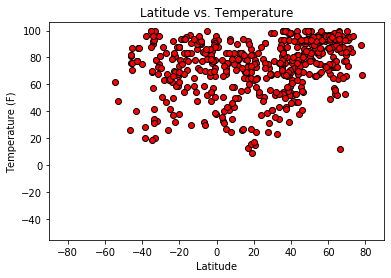

In [27]:
# Latitude vs. Temperature Plot
plt.scatter(latitude, humidity, marker="o", facecolors="red", edgecolors="black")
# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(-90,90)
plt.ylim(min_temp-10, max_temp+10)
plt.margins(.2)
plt.show()

#### Latitude vs. Humidity Plot

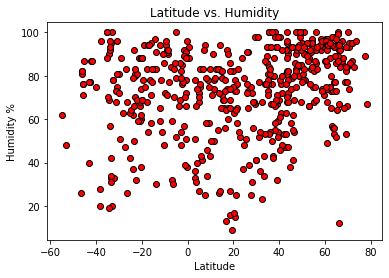

In [21]:
# Latitude vs. Humidity Plot
plt.scatter(latitude, humidity, marker="o", facecolors="red", edgecolors="black")
# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

plt.show()

#### Latitude vs. Cloudiness Plot

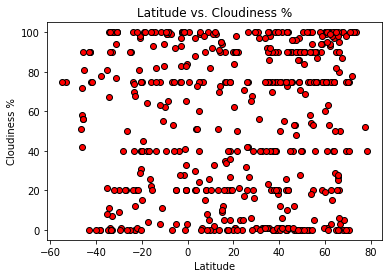

In [22]:
# Latitude vs. Cloudiness
plt.scatter(latitude, cloudiness, marker="o", facecolors="red", edgecolors="black")
# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Cloudiness %")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

plt.show()

#### Latitude vs. Wind Speed Plot

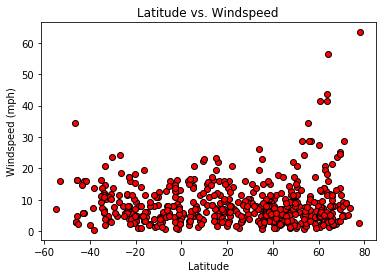

In [23]:
# Latitude vs. Wind Speed
plt.scatter(latitude, windspeed, marker="o", facecolors="red", edgecolors="black")
# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")

plt.show()